<a href="https://colab.research.google.com/github/bhagyashri003/DeeplearningLab/blob/main/Week1_Single_Unit_Perceptron_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a. Design a single unit perceptron for classification of a linearly separable binary dataset (placement.csv)
without using pre-defined models. Use the Perceptron() from sklearn.

[[-4648.  10837.6]]
[-531.]
accuracy score is 0.5803


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

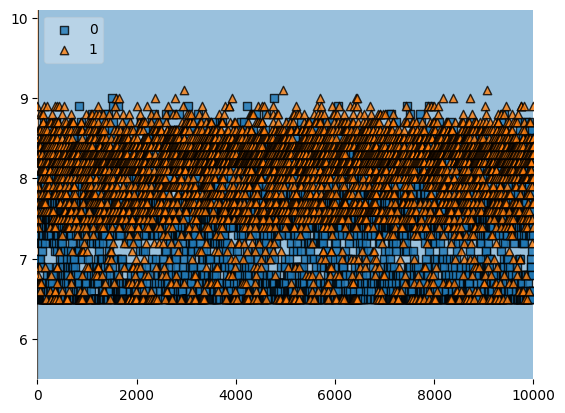

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions

# Load data
df = pd.read_csv('placementdata.csv')
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

# Convert y to integers if needed
le = LabelEncoder()
y = le.fit_transform(y)

# Fit the perceptron model
p = Perceptron()
p.fit(X, y)

# Print the coefficients and intercept
print(p.coef_)
print(p.intercept_)

# Calculate and print the accuracy score
z = p.score(X, y)
print("accuracy score is", z)

# Plot decision regions
plot_decision_regions(X.values, y, clf=p, legend=2)


# New Section

Exercise:
Design a single unit perceptron for classification of a linearly separable binary dataset without using pre-defined
models. Use the Perceptron() from sklearn.

In [ ]:
#hint-use make_classification() to generate binary dataset from sklearn
#Eg:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2,
n_informative=1,n_redundant=0,n_classes=2, n_clusters_per_class=1,
random_state=41,hypercube=False,class_sep=10)

Identify the problem with single unit Perceptron. Classify using Or-, And- and Xor-ed data and analyse the result.

[[2. 2.]]
[-2.]
[[2. 2.]]
[-1.]
[[0. 0.]]
[0.]


<Axes: >

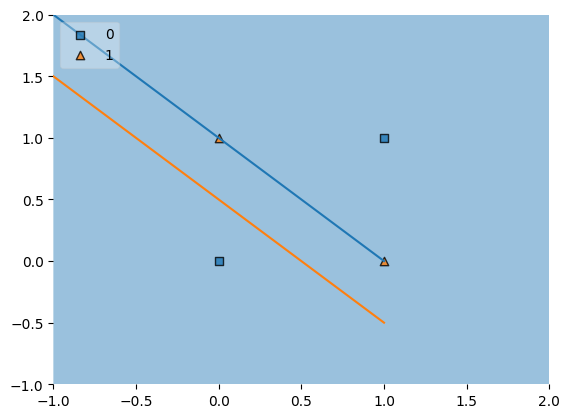

In [ ]:
# Perceptron on Or-, And- and Xor-ed data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
or_data = pd.DataFrame()
and_data = pd.DataFrame()
xor_data = pd.DataFrame()
or_data['input1']=[1,1,0,0]
or_data['input2']=[1,0,1,0]
or_data['ouput']=[1,1,1,0]
and_data['input1']=[1,1,0,0]
and_data['input2']=[1,0,1,0]
and_data['ouput']=[1,0,0,0]
xor_data['input1']=[1,1,0,0]
xor_data['input2']=[1,0,1,0]
xor_data['ouput']=[0,1,1,0]
from sklearn.linear_model import Perceptron
clf1=Perceptron()
clf2=Perceptron()
clf3=Perceptron()
clf1.fit(and_data.iloc[:,0:2].values,and_data.iloc[:,-1].values)
print(clf1.coef_)
print(clf1.intercept_)
x=np.linspace(-1,1,5)
y=-x+1
plt.plot(x,y)
#sns.scatterplot(and_data['input1'],and_data['input2'],hue=and_data['ouput'],s=200)
clf2.fit(or_data.iloc[:,0:2].values,or_data.iloc[:,-1].values)
print(clf2.coef_)
print(clf2.intercept_)
x1=np.linspace(-1,1,5)
y1=-x+0.5
plt.plot(x1,y1)
#sns.scatterplot(or_data['input1'],or_data['input2'],hue=or_data['ouput'],s=200)
clf3.fit(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values)
print(clf3.coef_)
print(clf3.intercept_)
plot_decision_regions(xor_data.iloc[:,0:2].values,xor_data.iloc[:,-1].values,
clf=clf3, legend=2)

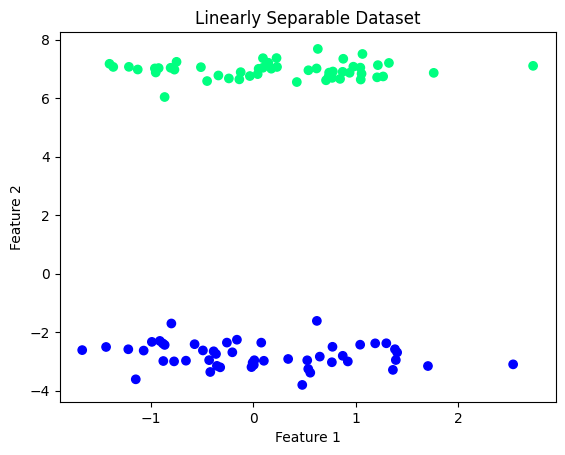

In [ ]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

# Generate linearly separable data
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
    hypercube=False,
    class_sep=10
)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linearly Separable Dataset')
plt.show()


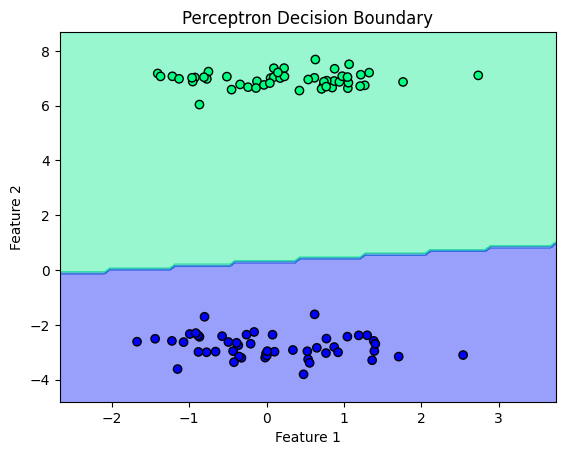

In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Training loop
        for epoch in range(self.epochs):
            for i in range(X.shape[0]):
                # Calculate the output
                linear_output = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation_function(linear_output)

                # Update weights if there is a misclassification
                update = self.learning_rate * (y[i] - y_pred)
                self.weights += update * X[i]
                self.bias += update

    def activation_function(self, x):
        return 1 if x >= 0 else 0  # Step function

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.array([self.activation_function(i) for i in linear_output])

    def plot_decision_boundary(self, X, y):
        # Plot decision boundary
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.4, cmap='winter')
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='winter')
        plt.title("Perceptron Decision Boundary")
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()

# Step 3: Train Perceptron Model
perceptron = Perceptron(learning_rate=0.01, epochs=100)
perceptron.fit(X, y)

# Step 4: Visualize the decision boundary
perceptron.plot_decision_boundary(X, y)


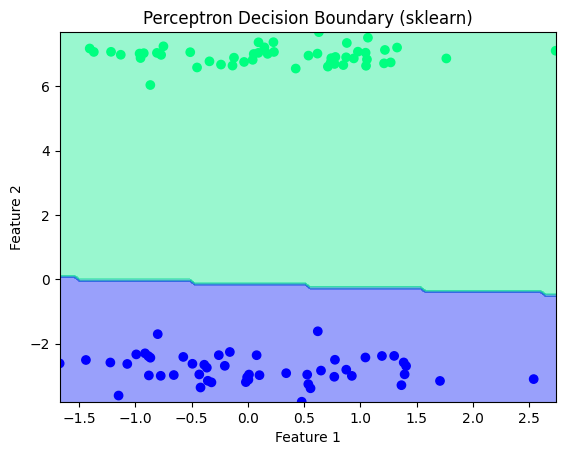

In [ ]:
from sklearn.linear_model import Perceptron

# Train using sklearn's perceptron
clf = Perceptron(max_iter=1000, eta0=0.01)
clf.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='winter')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Perceptron Decision Boundary (sklearn)")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
